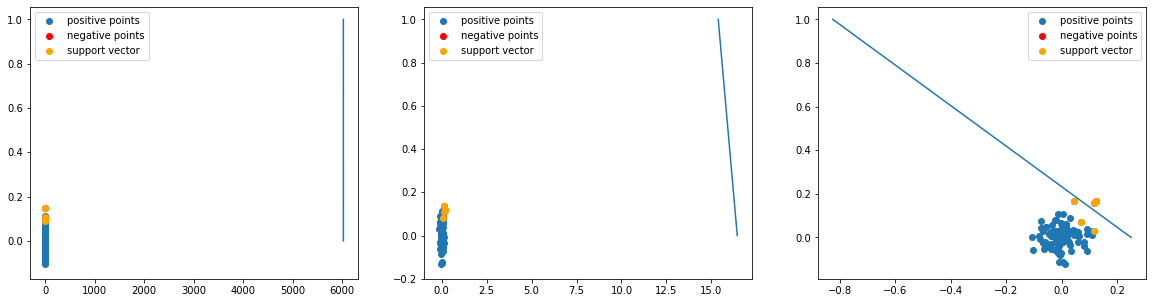

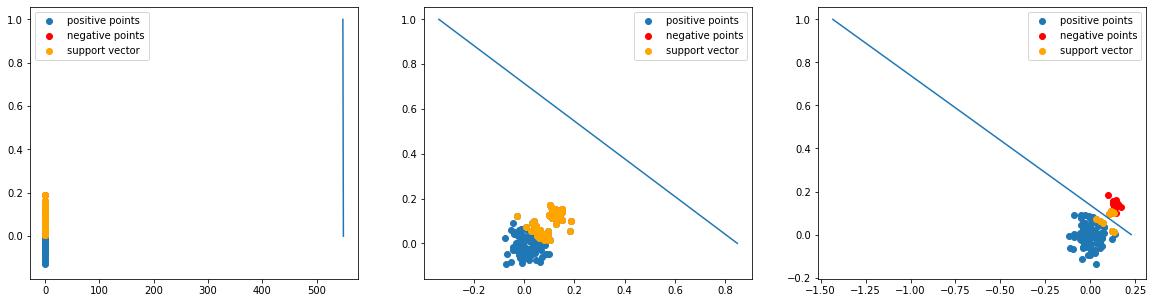

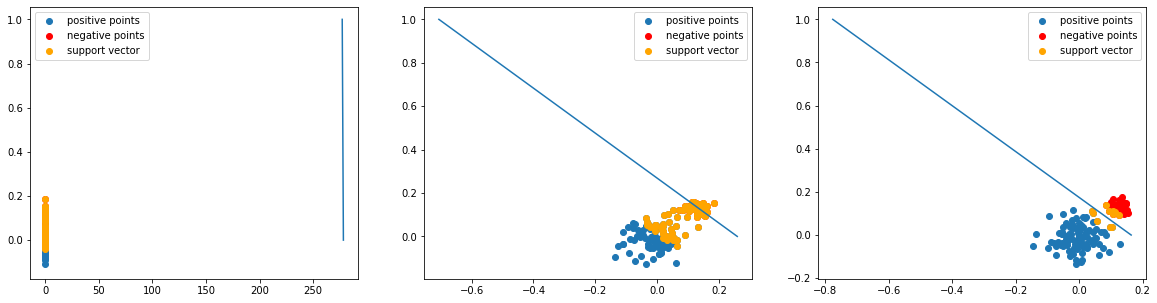

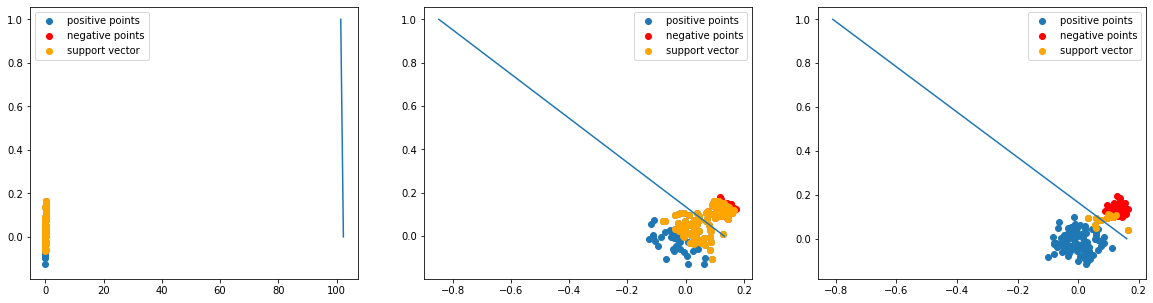

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
def draw_line(coef,intercept, mi, ma):
    points=np.array([[(((-coef[0][1])*mi - intercept)/(coef[0][0])), mi],[(((-coef[0][1])*ma - intercept)/(coef[0][0])), ma]])
    plt.plot(points[:,0], points[:,1])
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c = [0.001,1,100]
for j,i in enumerate(ratios):
    plt.figure(figsize=(20,5))
    for k,l in enumerate(c):
        plt.subplot(1, 3, k+1)
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        a = np.concatenate((X_p,X_n),axis=0)
        b = np.concatenate((y_p,y_n),axis=0)
        clf = SVC(C=l,kernel='linear',gamma='auto')
        clf.fit(a,b)
        r = clf.support_vectors_
        e = [r[i][0] for i in range(len(r))]
        f = [r[i][1] for i in range(len(r))]
        plt.scatter(X_p[:,0],X_p[:,1],label = 'positive points')
        plt.scatter(X_n[:,0],X_n[:,1],color='red',label = 'negative points')
        plt.scatter(e,f,color='orange',label = 'support vector')
        plt.legend(loc = "best")
        draw_line(clf.coef_,clf.intercept_,0,1)
    plt.show()

        
    
    

Observations:
1. We can see in first row(data is severly imbalanced) as we go toward the right , the regularization strength is increasing which typically means we are overfitting. Since the data is severly imbalanced, our hyperplane is not able to separate the classes. For the third graph still our classifier works better as c ompared to the first graph as the value of C is higher for third.
2. We can see in the second row(data is highly imbalanced) as we go toward the right, the regularization strength is increasing which means tendency to overfit increases and underfit decreases. Since the data is highly imbalanced the hyperplane has been able to separate our classes only for high regularization strength(high value of C). In the third graph, we can see the support vectors(yellow points) representing the pi+ and pi- planes(margin) but still our pi+ and pi- planes are not that clear.
3. We can see in third row(data is still highly imbalanced) as we go towards the right, the regularization strength is increasing and we are getting good separation in third graph(overfitting). Here, the pi+ and pi- hyperplanes are also clearly visible in the third graph.
4. We can see in the fourth row(data is almost balanced)  as we go towards the right, the regularization strength is increasing 
and we are getting good separation in third graph and fairly good in second graph. Here, the pi+ and pi- hyperplanes are also clearly visible in the third graph and fairly in second graph. 
5. As we are going from top to bottom the quantity of support vectors is increasing specifically for 1st and 2nd column. 

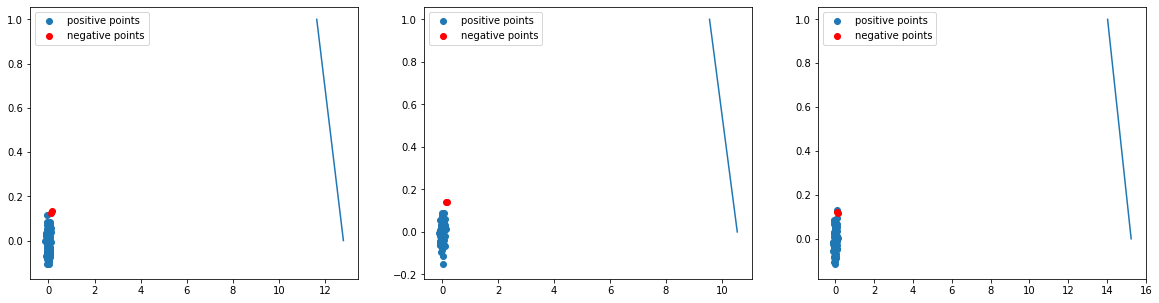

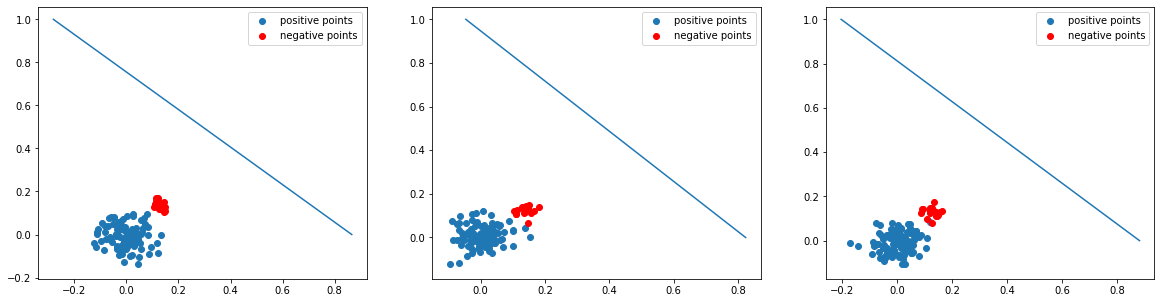

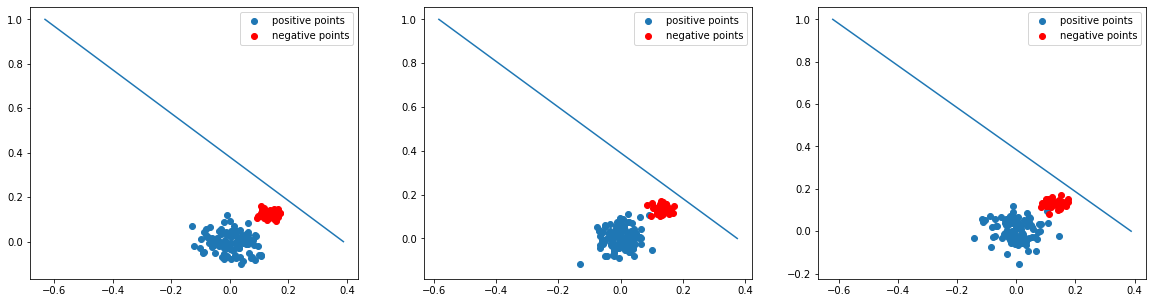

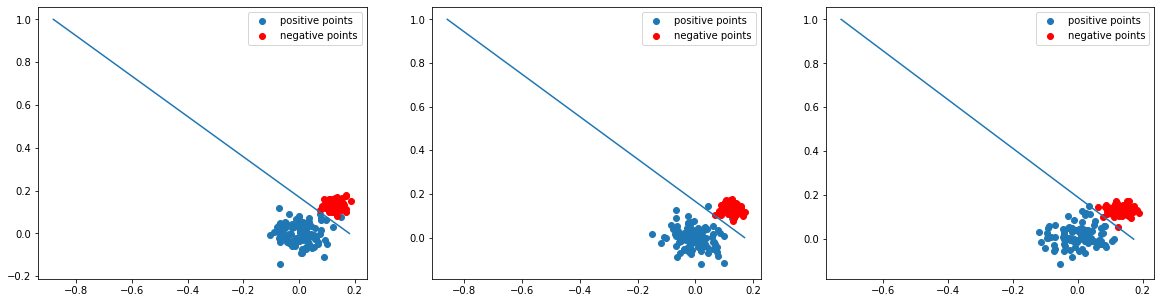

In [4]:
def draw_line(coef,intercept, mi, ma):
    points=np.array([[(((-coef[0][1])*mi - intercept)/(coef[0][0])), mi],[(((-coef[0][1])*ma - intercept)/(coef[0][0])), ma]])
    plt.plot(points[:,0], points[:,1])
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c = [0.001,1,100]
for j,i in enumerate(ratios):
    plt.figure(figsize=(20,5))
    for k,l in enumerate(c):
        plt.subplot(1, 3, k+1)
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        a = np.concatenate((X_p,X_n),axis=0)
        b = np.concatenate((y_p,y_n),axis=0)
        clf = LogisticRegression().fit(a,b)
        plt.scatter(X_p[:,0],X_p[:,1],label = 'positive points')
        plt.scatter(X_n[:,0],X_n[:,1],color='red',label = 'negative points')
        plt.legend(loc = "best")
        draw_line(clf.coef_,clf.intercept_,0,1)
    plt.show()


Observations:
1. Unlike SVC, Logistic regression is able to separate the classes only in the case of almost balanced dataset.
2. For first three rows , there is not a single hyperplane which is able to separate our classes.
3. For the forth row, as the regularization strength(lambda) increases tendency to underfit increases. As we can see for the middle graph we are getting a good fit because the points are separated and are away from the margin.